In [143]:
import numpy as np 
import pandas as pd 
import cv2
from matplotlib import pyplot as plt
import os


In [144]:
imgloc=[]
label=[]
for dirname, _, filenames in os.walk('custome dataset/toys'):
    for filename in filenames:
        imgloc.append((os.path.join(dirname, filename)))
        label.append(0)
        #print(imgloc)
for dirname, _, filenames in os.walk('custome dataset/products'):
    for filename in filenames:
        imgloc.append((os.path.join(dirname, filename)))
        label.append(1)


In [145]:
img=[]
for i in range(0, len(imgloc)):
    img1 = cv2.imread(imgloc[i],1)
    img2 = np.array(img1)
    img2 = cv2.resize(img2,(128,128))
    img.append(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))
print(len(label),len(img))    

302 302


<Figure size 432x288 with 0 Axes>

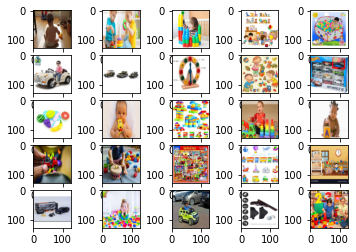

In [146]:
plt.figure()
f, axarr = plt.subplots(5,5) 

for i in range(0,5):
    for j in range(0,5):
        axarr[i][j].imshow(img[(5*i)+j])

In [188]:
d={'image':img,'label':label}

In [189]:
df=pd.DataFrame(d)

In [191]:
df.head()

,image,label
0,"[[[27, 27, 25], [11, 11, 11], [11, 11, 11], [1...",0
1,"[[[243, 243, 243], [251, 253, 253], [249, 253,...",0
2,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0
3,"[[[254, 254, 254], [254, 254, 254], [254, 254,...",0
4,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0


In [192]:
df = df.sample(frac = 1) 

In [194]:
df.head()

,image,label
142,"[[[255, 255, 255], [254, 254, 254], [255, 255,...",1
137,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",1
215,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",1
208,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",1
28,"[[[136, 134, 129], [180, 182, 177], [199, 204,...",0


In [210]:
x_train=df.iloc[:,0:1].values
y_train=df.iloc[:,-1:].values
x_train

array([[array([[[255, 255, 255],
        [254, 254, 254],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [254, 254, 254]],

       [[255, 255, 255],
        [252, 252, 252],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [255, 255, 255],
        [254, 254, 254]],

       [[254, 254, 254],
        [252, 252, 252],
        [255, 255, 255],
        ...,
        [254, 254, 254],
        [255, 255, 255],
        [254, 254, 254]],

       ...,

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [255, 255, 255],
        [254, 254, 254],
        [254, 25

In [206]:
np.array(img).shape

(302, 128, 128, 3)

In [197]:
from tensorflow.keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Sequential
model = Sequential()
model.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1),activation='tanh',input_shape=img[0].shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [198]:
from tensorflow import keras
model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.RMSprop(lr=0.01),
              metrics=['accuracy'])

In [202]:
history = model.fit(np.array(x_train), np.array(y_train), batch_size=10, epochs=30, verbose=1)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type numpy.ndarray).

In [154]:
test=pd.read_csv("dataset/test.csv")

In [155]:
test.head()

,Image,Class_of_image,Brand_name
0,006a22fa50.jpg,NaN,NaN
1,01484e7348.jpg,NaN,NaN
2,015d91ab7b.jpg,NaN,NaN
3,01f8ce31f6.jpg,NaN,NaN
4,020e280221.jpg,NaN,NaN


In [156]:
test_filename=test["Image"]
test_filename

0       006a22fa50.jpg
1       01484e7348.jpg
2       015d91ab7b.jpg
3       01f8ce31f6.jpg
4       020e280221.jpg
             ...      
1126    fe97c8f4b2.jpg
1127    fea831ee5f.jpg
1128    fef359ca4f.jpg
1129    ff11b2859a.jpg
1130    ffbf5217ec.jpg
Name: Image, Length: 1131, dtype: object

In [157]:
test_img_names=[]
for dirname, _, filenames in os.walk('dataset/images'):
    for filename in filenames:
        test_img_names.append((os.path.join(dirname, filename)))

In [158]:
test_img_names

['dataset/images/dd784602ff.jpg',
 'dataset/images/e7901c6fa1.jpg',
 'dataset/images/5739f2ddc7.jpg',
 'dataset/images/ec87a29964.jpg',
 'dataset/images/4f36874a75.jpg',
 'dataset/images/a36c4bda06.jpg',
 'dataset/images/1cf281d0e3.jpg',
 'dataset/images/83e1b03322.jpg',
 'dataset/images/f372ffc339.jpg',
 'dataset/images/887081ffb7.jpg',
 'dataset/images/600bfc0f0a.jpg',
 'dataset/images/1deece205e.jpg',
 'dataset/images/90bcc5a8b0.jpg',
 'dataset/images/7e104030c3.jpg',
 'dataset/images/11185cd72b.jpg',
 'dataset/images/b18f6eaf05.jpg',
 'dataset/images/34ffe19b34.jpg',
 'dataset/images/519e9a7a16.jpg',
 'dataset/images/a9db36364d.jpg',
 'dataset/images/073c7e5c71.jpg',
 'dataset/images/e6b87f4a1f.jpg',
 'dataset/images/706f9c5d22.jpg',
 'dataset/images/26efd8096f.jpg',
 'dataset/images/8624657723.jpg',
 'dataset/images/114d426fee.jpg',
 'dataset/images/afa56aadf8.jpg',
 'dataset/images/39bd7d94e6.jpg',
 'dataset/images/4a70cd5b2a.jpg',
 'dataset/images/b71907d66a.jpg',
 'dataset/imag

In [159]:
img_arrays=[]
for i in range(0, len(test_img_names)):
    img1 = cv2.imread(test_img_names[i],1)
    img2 = np.array(img1)
    img2 = cv2.resize(img2,(128,128))
    img_arrays.append(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))

<Figure size 432x288 with 0 Axes>

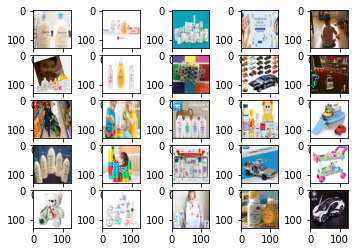

In [160]:
plt.figure()
f, axarr = plt.subplots(5,5) 

for i in range(0,5):
    for j in range(0,5):
        axarr[i][j].imshow(img_arrays[(5*i)+j])

In [161]:
from tensorflow import keras
model.save("model")
#model = keras.models.load_model("model")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model/assets


In [162]:
pred = model.predict((np.array(img_arrays)))
pred

array([[0.56325287],
       [0.56325287],
       [0.56325287],
       ...,
       [0.56325287],
       [0.56325287],
       [0.56325287]], dtype=float32)

In [163]:
pred= [int(round(p[0])) for p in pred]


In [185]:
pred.count(1)

1119

In [165]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [166]:
final=[]
for i in pred:
    if(i==0):
        final.append("toys")
    else:
        final.append("consumer_products")
        
        

In [167]:
image_id=test['Image']

In [168]:
df=pd.DataFrame()

In [169]:
test['Class_of_image']=final

In [170]:
test['Class_of_image'].unique()

array(['consumer_products', 'toys'], dtype=object)

In [171]:
img_text=[]
for i in range(0, len(test_img_names)):
    img1 = cv2.imread(test_img_names[i],1)

In [31]:
#!pip install easyocr

Defaulting to user installation because normal site-packages is not writeable


In [172]:
import pytesseract

In [173]:
text=[]
for i in img_arrays:
    text.append((pytesseract.image_to_string(i)))
    

In [174]:
t=text

In [175]:
x=[i.strip() for i in t]

In [176]:
x=[i.replace(" ","") for i in x]
x=[i.replace('(',"") for i in x]

In [177]:
#x=["".join(i.split()) for i in x]
c=0
for i in x:
    x[c]=[''.join(e for e in i if e.isalnum())]
    c+=1

In [178]:
c=0
for i in x:
    if(i==[""]):
        x[c]=['Unnamed']
    c+=1;

In [179]:
ans=[]
for i in x:
    ans.append(i[0])
ans    

['Unnamed',
 'Unnamed',
 'eo',
 'whaltaun4iieoa',
 'Unnamed',
 'Unnamed',
 'Unnamed',
 'Unnamed',
 'Unnamed',
 'Unnamed',
 'Unnamed',
 'Unnamed',
 'Unnamed',
 'Unnamed',
 'Unnamed',
 'Unnamed',
 'Unnamed',
 'Unnamed',
 'suenerinret',
 'Unnamed',
 'Unnamed',
 '4of30a',
 'Unnamed',
 'Unnamed',
 'Unnamed',
 'Unnamed',
 'Unnamed',
 'Unnamed',
 'Unnamed',
 'poaeaie',
 'Unnamed',
 'Unnamed',
 'Unnamed',
 'Unnamed',
 'Unnamed',
 'Unnamed',
 'Unnamed',
 'Unnamed',
 'Unnamed',
 'Unnamed',
 'Unnamed',
 'Unnamed',
 'Unnamed',
 'Unnamed',
 'Unnamed',
 'Unnamed',
 'Unnamed',
 'Unnamed',
 'Unnamed',
 'Unnamed',
 'Unnamed',
 'Unnamed',
 'Unnamed',
 'Unnamed',
 'Unnamed',
 'Unnamed',
 'Unnamed',
 'Unnamed',
 'Unnamed',
 'eae',
 'Unnamed',
 'Unnamed',
 'BABS',
 'Unnamed',
 'Unnamed',
 'Unnamed',
 'Unnamed',
 'Unnamed',
 'Unnamed',
 'Unnamed',
 'Unnamed',
 'Unnamed',
 'Unnamed',
 'Unnamed',
 'Ged',
 'Unnamed',
 'Unnamed',
 'Unnamed',
 'Unnamed',
 'Unnamed',
 'Unnamed',
 'Unnamed',
 'Unnamed',
 'Unnamed'

In [180]:
test['Brand_name']=ans

In [181]:
test.head()

,Image,Class_of_image,Brand_name
0,006a22fa50.jpg,consumer_products,Unnamed
1,01484e7348.jpg,consumer_products,Unnamed
2,015d91ab7b.jpg,consumer_products,eo
3,01f8ce31f6.jpg,consumer_products,whaltaun4iieoa
4,020e280221.jpg,consumer_products,Unnamed


In [183]:
test.to_csv("./first_submission1.csv", sep=',',index=True)